# No.1 Lost circulation field data analysis

In [1]:
# drilling data analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import csv
import os
%matplotlib inline

# set the current work directiory
os.chdir('C:/Users/rur4893/Desktop/Real Time Lost Circulation')

# load drilling lost circulation data
time = []
lost_volume = []
Drilling_data = np.zeros(shape=(120,2))

with open('DS_lost_data.txt', 'r') as f:
    data = csv.reader(f, delimiter = '\t')
    for row in data:
        time.append(float(row[0]))
        lost_volume.append(float(row[1]))

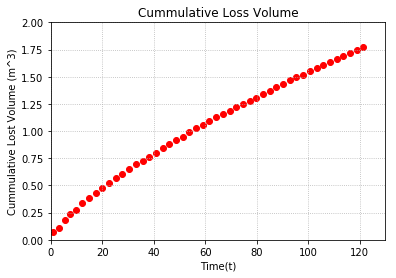

In [4]:
n_time = len(time)
fig, ax1 = plt.subplots()
for i in range(n_time):
    plt.scatter(time[i],lost_volume[i], c = 'r')
plt.xlim([0,130])
plt.ylim([0, 2])
plt.xlabel('Time(t)')
plt.ylabel('Cummulative Lost Volume (m^3)')
plt.title('Cummulative Loss Volume')
ax1.xaxis.grid(True, which = "major", linestyle = "dotted")
ax1.yaxis.grid(True, which = "major", linestyle = "dotted")
plt.show()

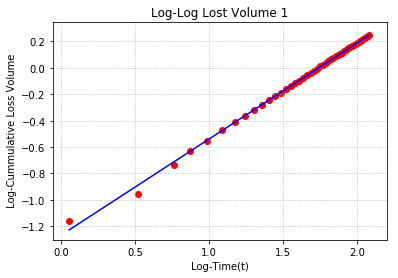

In [5]:
import math

fig, ax1 = plt.subplots()
for i in range(n_time):
    plt.scatter(math.log10(time[i]), math.log10(lost_volume[i]), c = 'r')
# be careful of log(x) = ln(x) and log10(x)---base 
plt.xlabel('Log-Time(t)')
plt.ylabel(' Log-Cummulative Loss Volume')
plt.title('Log-Log Lost Volume {0}'.format(1))
ax1.xaxis.grid(True, which = "major", linestyle = "dotted")
ax1.yaxis.grid(True, which = "major", linestyle = "dotted")

from sklearn.linear_model import LinearRegression
# calculate log10(time)
log_time = [math.log10(i) for i in time]
x_time = np.ones(shape=(n_time,2))
x_time[:,0]= log_time

# calculate log10(volume)
y_volume = [math.log10(i) for i in lost_volume]

# wrong we should use the log data and linear regression
reg = LinearRegression().fit(x_time,y_volume)
plt.plot(x_time[:,0], reg.predict(x_time), 'b')
plt.show()
# here the coefficinet is really small, pls double check
# the calculation according to the inv(X.T@X)X.T = y 
# coefficient = 0.72

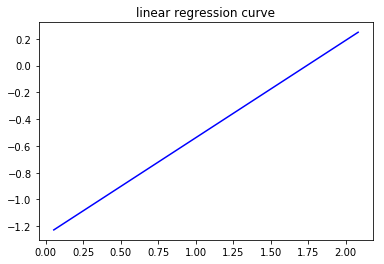

In [6]:
from sklearn.linear_model import LinearRegression
# calculate log10(time)
log_time = [math.log10(i) for i in time]
x_time = np.ones(shape=(n_time,2))
x_time[:,0]= log_time

# calculate log10(volume)
y_volume = [math.log10(i) for i in lost_volume]

# wrong we should use the log data and linear regression
reg = LinearRegression().fit(x_time,y_volume)
plt.plot(x_time[:,0], reg.predict(x_time), 'b')
plt.title('linear regression curve')
plt.show()
# here the coefficinet is really small, pls double check
# the calculation according to the inv(X.T@X)X.T = y 
# coefficient = 0.72

[ 0.72682185  0.        ]
0.0


Text(0.5,1,'Hough Space Transformation')

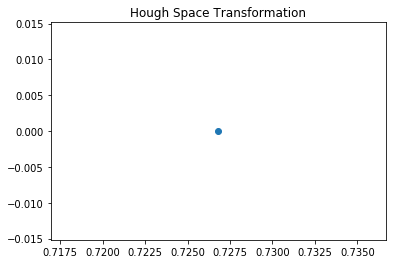

In [7]:
# Hough space transformation for the figure
print(reg.coef_)
plt.scatter(reg.coef_[0],reg.coef_[1])
print(reg.coef_[1])
plt.title('Hough Space Transformation')

# No.2 Theoretical lost circulation type-curve data analysis

## (1) Theoretical type curve calculation (Original one)

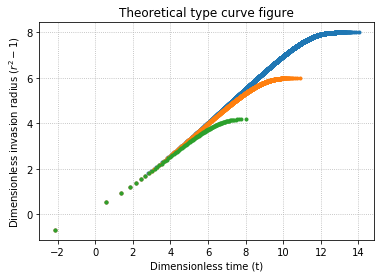

In [22]:
# theoretical type curve data analysis
# do not use vectorization integration
# calculation use adaptive quad integration
from scipy.integrate import simps
from scipy.integrate import quad

# input the basic drilling parameters
m = 0.65                 # flow behavior index
K = 1.85                 # fluid consistency
delta_p = 4.2 * 10**6    # over-pressure
tau_y = 5.62             # yield stress pa

# dimensionless lost circulation parameters
# Dimensionless_a = [0.0001,0.008,0.001]  The original dimensionless group

Dimensionless_a = [0.0001,0.001,0.008]

# define the dimensionless function for this calculation

f = lambda x: 2.**((m+1)/m)*x*(((x**(1-m))-1)/(1-m))**(1/m)/(1-a*(x-1))**(1/m)

# calculation time step
# dynamic list append
Rad_d =  []
Time_d = []

for k,v in enumerate(Dimensionless_a):
    
    Radius_d_init = 1.1                            # the initial R_d
    Radius_d_alti = 1 + 1./v                       # the altimate R_d

    Radius_d = np.arange(Radius_d_init, Radius_d_alti)
    total_time_step = len(Radius_d)
    # calculation the time step matrices
    Rad_d.append(Radius_d);

# seven matrices
# use quad integration

for k,a in enumerate(Dimensionless_a):
    Y = [quad(f,1.01,int_val)[0] for int_val in Rad_d[k]]
    Time_d.append(Y)
    
fig, ax3 = plt.subplots()
# plt.figure(figsize=(10,8))
for i in range(len(Dimensionless_a)):
    plt.plot(np.log10(Time_d[i]),np.log10(Rad_d[i]**2 - 1), '.')
    
plt.title('Theoretical type curve figure')
plt.xlabel('Dimensionless time (t)')
plt.ylabel('Dimensionless invasion radius $({r^2 - 1})$')
# plt.legend()

ax3.xaxis.grid(True, which = 'Major', linestyle='dotted')
ax3.yaxis.grid(True, which = 'Major', linestyle='dotted') 

# Good time_step algorithm.
# Radius_d  the fluid invasion radius.

In [24]:
print(len(Rad_d))
print(len(Time_d))

3
3


## (2) Theoretical Type Curve with different loss zone 

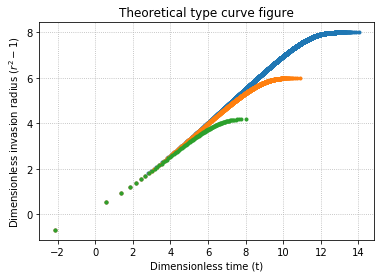

In [30]:
# theoretical type curve data analysis
# do not use vectorization integration
# calculation use adaptive quad integration
from scipy.integrate import simps
from scipy.integrate import quad

# input the basic drilling parameters
m = 0.65                 # flow behavior index
K = 1.85                 # fluid consistency
delta_p = 4.2 * 10**6    # over-pressure
tau_y = 5.62             # yield stress pa
r_w = 311.2/2/1000       # wellbore radius

# dimensionless lost circulation parameters
# Dimensionless_a = [0.0001,0.008,0.001]  The original dimensionless group
# the smaller alpha, the larger fricture width

Dimensionless_a = [0.0001,0.001,0.008]
w = lambda a: (2*m+1)/(m+1)*(2*r_w)/a*tau_y/delta_p

# calculate the fracture width unit(m)
width = [w(a) for a in Dimensionless_a]

# define the dimensionless function for this calculation
a = lambda w: (2*m+1)/(m+1)*(2*r_w)/w*tau_y/delta_p
f = lambda x: 2.**((m+1)/m)*x*(((x**(1-m))-1)/(1-m))**(1/m)/(1-a*(x-1))**(1/m)

# calculation time step
# dynamic list append
Rad_d = []
Time_d = []

for k,v in enumerate(Dimensionless_a):
    
    Radius_d_init = 1.1                            # the initial R_d
    Radius_d_alti = 1 + 1./v                       # the altimate R_d

    Radius_d = np.arange(Radius_d_init, Radius_d_alti)
    total_time_step = len(Radius_d)
    # calculation the time step matrices
    Rad_d.append(Radius_d);

# seven matrices
# use quad integration

for k,a in enumerate(Dimensionless_a):
    Y = [quad(f,1.01,int_val)[0] for int_val in Rad_d[k]]
    Time_d.append(Y)
    
figure, ax3 = plt.subplots()

for i in range(len(Dimensionless_a)):
    plt.plot(np.log10(Time_d[i]),np.log10(Rad_d[i]**2 - 1), '.')
    
plt.title('Theoretical type curve figure')
plt.xlabel('Dimensionless time (t)')
plt.ylabel('Dimensionless invasion radius $({r^2 - 1})$')
# plt.legend()

ax3.xaxis.grid(True, which = 'Major', linestyle='dotted')
ax3.yaxis.grid(True, which = 'Major', linestyle='dotted')
# Good time_step algorithm.
# Radius_d  the fluid invasion radius.

## (3) Data analysis for theoretical type curve

## (a) Linear regression--sklearn

0.961874983155
[ 0.58071619  0.        ]


Text(0,0.5,'radius')

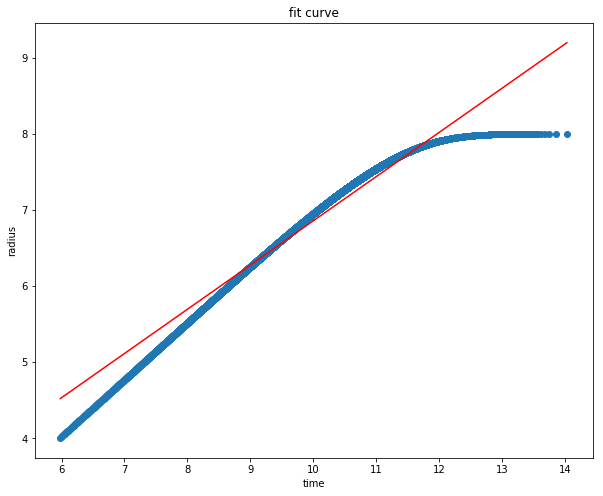

In [31]:
# use the linear regression to analysis the linearization
# use the Hough transformation to projection
# pls cut off the initial point because of the dysfunction of numerical integration
# we cut of the initial point of the calculation
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(np.log10(Time_d[0][100:]),np.log10(Rad_d[0][100:]**2 - 1))
reg = LinearRegression()
length = len(Time_d[0])-100
x_val = np.ones(shape=(length,2))
x_val[:,0] = np.log10(Time_d[0][100:])
y_val = np.log10(Rad_d[0][100:]**2-1)
reg.fit(x_val,y_val)
print(reg.score(x_val,y_val))
plt.plot(x_val[:,0],reg.predict(x_val), c='r' )
print(reg.coef_)

plt.title ('fit curve')
plt.xlabel('time')
plt.ylabel('radius')

In [32]:
from sklearn.linear_model import LinearRegression

0.253536127805
0.970793827461


array([ 0.58032242,  0.        ])

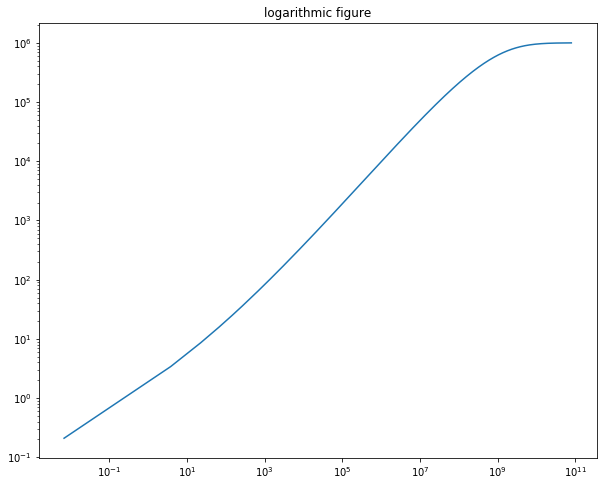

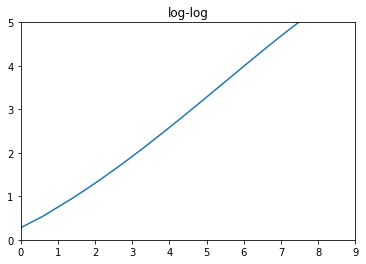

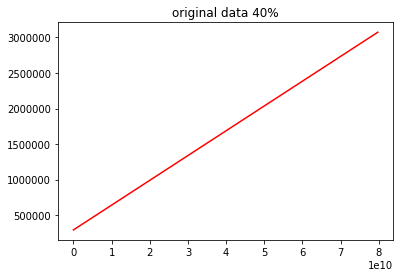

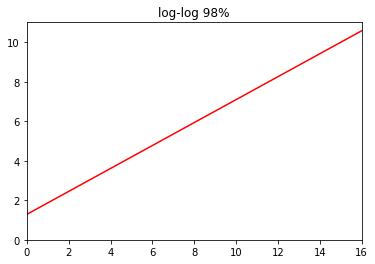

In [34]:
import matplotlib.pyplot as plt
# %matplotlib inline
plt.figure(figsize=(10,8))

# if cut off the initial point!!
plt.loglog(Time_d[1], Rad_d[1]**2 - 1)
plt.title('logarithmic figure')
plt.figure()
plt.plot(np.log10(Time_d[1]), np.log10(Rad_d[1]**2-1))
plt.title('log-log')
plt.xlim([0,9])
plt.ylim([0,5])

# if curve-fitting the original data
# score only 0.409
plt.figure()
reg = LinearRegression()
length = len(Time_d[1])
x_val = np.ones(shape=(length,2))
x_val[:,0] = Time_d[1]
y_val = Rad_d[1]**2-1
reg.fit(x_val,y_val)
print(reg.score(x_val,y_val))
plt.plot(x_val[:,0],reg.predict(x_val), c='r' )
plt.title('original data 40%')
reg.coef_

# if curve-fitting the log-log data
# the score can be 98% 
plt.figure()
reg = LinearRegression()
length = len(Time_d[1])
x_val = np.ones(shape=(length,2))
x_val[:,0] = np.log(Time_d[1])
y_val = np.log(Rad_d[1]**2-1)
reg.fit(x_val,y_val)
print(reg.score(x_val,y_val))
plt.plot(x_val[:,0],reg.predict(x_val), c='r' )
plt.xlim([0, 16])
plt.ylim([0, 11])
plt.title('log-log 98%')
reg.coef_

## (b) Curve fitting method in python

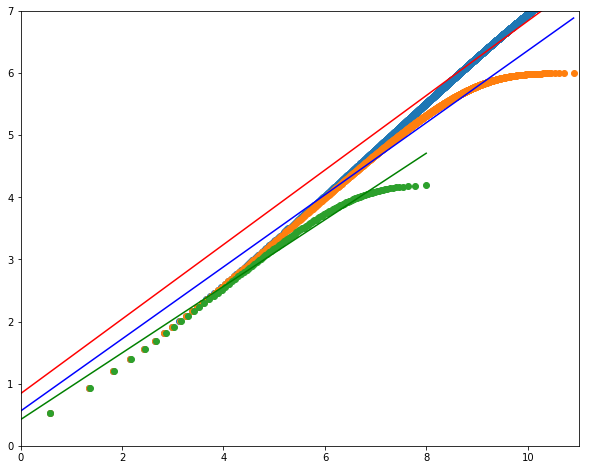

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))

coef = []
color = ['r', 'b', 'g']
for i in range(len(Dimensionless_a)):
    plt.scatter(np.log10(Time_d[i]),np.log10(Rad_d[i]**2 - 1))
    reg = LinearRegression()
    length = len(Time_d[i])
    x_val = np.ones(shape=(length,2))
    x_val[:,0] = np.log10(Time_d[i])
    y_val = np.log10(Rad_d[i]**2-1)
    reg.fit(x_val,y_val)
    coef.append(reg.coef_)
    # print(reg.score(x_val,y_val))
    plt.plot(x_val[:,0],reg.predict(x_val), c= color[i] )
    plt.xlim([0,11])
    plt.ylim([0,7])

# why the interception is always zeros!!!??? here has a problem
# print (coef)

## (3) Hough Space Transformation

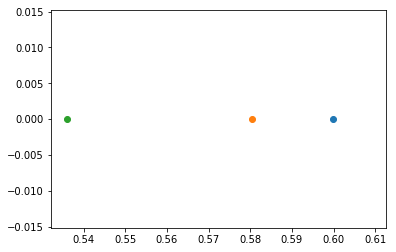

In [36]:
# becasue there is no vertical line
# can use the basic hough space transform
# no-need line transform
%matplotlib inline
# plt.scatter (reg.coef_[0],reg.coef_[1], reg.coef_[2])
for i in range(len(Dimensionless_a)):
    plt.scatter(coef[i][0], coef[i][1])

## (4) Decision boundary calculation for the type curve

###  Differentiate the total loss and partial loss

In [37]:
# SVM decision making or ANN transfer

In [38]:
# input machine learning data and add label in the calculation

In [39]:
# according to each point
# we know the fracture width, delta_pressure
# we can calculate lost circulation flow rate

# Q_loss = lambda w, r : math.pi * 

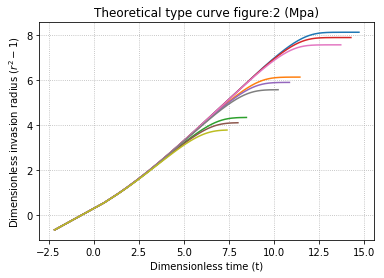

In [42]:
from scipy.integrate import quad
import numpy as np
import pandas as pd

# input the basic drilling parameters
m = 0.65                 # flow behavior index
K = 1.85                 # fluid consistency
delta_p = 3.2 * 10**6    # over-pressure
tau_y = 5.62             # yield stress pa
r_w = 311.2 /2 /1000     # wellbore radius


delta_ps = [4.2*10**6, 3.2*10**6, 2.2*10**6]
# calculation time step
# dynamic list append
Rad_ds = {}
Time_ds = {}

for delta_p in delta_ps:
    Rad_ds['%i' % delta_p] = []
    Time_ds['%i' % delta_p] = []

    
# iterate the pressure
for j, delta_p in enumerate(delta_ps):
    # dimensionless lost circulation parameters
    # Dimensionless_a = [0.0001,0.008,0.001]  The original dimensionless group
    # Dimensionless_a = [0.0001,0.001,0.008]

    width = [0.00677, 0.000677, 0.000085]
#     # w = lambda a: (2*m+1)/(m+1)*(2*r_w)/a*tau_y/delta_p
#     width = [w(a) for a in Dimensionless_a]
    a = lambda w: (2*m+1)/(m+1)*(2.*r_w)/w*tau_y/delta_p
    Dimensionless_a = [a(w) for w in width ]
    
    for k,v in enumerate(Dimensionless_a):

        Radius_d_init = 1.1                            # the initial R_d
        Radius_d_alti = 1 + 1./v                       # the altimate R_d

        Radius_d = np.arange(Radius_d_init, Radius_d_alti)
        total_time_step = len(Radius_d)
        # calculation the time step matrices
        Rad_ds['%i' % delta_p].append(Radius_d);

    # seven matrices
    # use quad integration

    for k,a in enumerate(Dimensionless_a):
        Y = [quad(f,1.01,int_val)[0] for int_val in Rad_ds['%i' % delta_p][k]]
        Time_ds['%i' % delta_p].append(Y)

R_d = pd.DataFrame(Rad_ds)
T_d = pd.DataFrame(Time_ds)

#plt.figure(figsize=(10,8))
figure, ax3 = plt.subplots()
for i in delta_ps:         # iterate for delta_ps
    for j in range(len(Dimensionless_a)):     # iterate for dimensionless_a
        plt.plot(np.log10(T_d['%i'%i][j][:]),np.log10(R_d['%i'%i][j][:]**2 - 1), '-')

plt.title('Theoretical type curve figure:%i (Mpa)' %(delta_p/1000000.))
plt.xlabel('Dimensionless time (t)')
plt.ylabel('Dimensionless invasion radius $({r^2 - 1})$')
# plt.legend()

ax3.xaxis.grid(True, which = 'Major', linestyle='dotted')
ax3.yaxis.grid(True, which = 'Major', linestyle='dotted') 

# Good time_step algorithm.
# Radius_d  the fluid invasion radius.
plt.ioff()

In [43]:

# plot the hough space transformation!

## The same fracture width, at different lost circulation area
##  We can get the type curve at different location

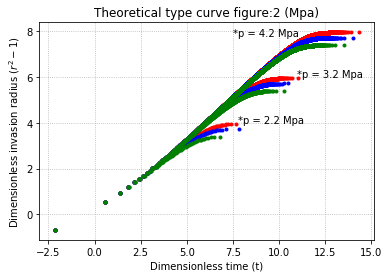

In [44]:
from scipy.integrate import quad
import numpy as np
import pandas as pd

# input the basic drilling parameters
m = 0.65                 # flow behavior index
K = 1.85                 # fluid consistency
tau_y = 5.62             # yield stress pa
r_w = 311.2 /2 /1000     # wellbore radius-

delta_ps = [4.2*10**6, 3.2*10**6, 2.2*10**6]
# calculation time step
# dynamic list append
Rad_ds = {}
Time_ds = {}

for delta_p in delta_ps:
    Rad_ds['%i' % delta_p] = []
    Time_ds['%i' % delta_p] = []
    
# iterate the pressure
for j, delta_p in enumerate(delta_ps):
    # dimensionless lost circulation parameters
    # Dimensionless_a = [0.0001,0.008,0.001]  The original dimensionless group
    # Dimensionless_a = [0.0001,0.001,0.008]

    width = [0.0055, 0.00055, 0.000055]
#     # w = lambda a: (2*m+1)/(m+1)*(2*r_w)/a*tau_y/delta_p
#     width = [w(a) for a in Dimensionless_a]
    a = lambda w: (2*m+1)/(m+1)*(2.*r_w)/w*tau_y/delta_p
    Dimensionless_a = [a(w) for w in width ]
    
    for k,v in enumerate(Dimensionless_a):

        Radius_d_init = 1.1                            # the initial R_d
        Radius_d_alti = 1 + 1./v                       # the altimate R_d

        Radius_d = np.arange(Radius_d_init, Radius_d_alti)
        total_time_step = len(Radius_d)
        # calculation the time step matrices
        Rad_ds['%i' % delta_p].append(Radius_d);

    # seven matrices
    # use quad integration

    for k,a in enumerate(Dimensionless_a):
        Y = [quad(f,1.01,int_val)[0] for int_val in Rad_ds['%i' % delta_p][k]]
        Time_ds['%i' % delta_p].append(Y)

R_d = pd.DataFrame(Rad_ds)
T_d = pd.DataFrame(Time_ds)

fig, ax = plt.subplots()
ax.xaxis.grid(True, which = 'Major', linestyle='dotted')
ax.yaxis.grid(True, which = 'Major', linestyle='dotted') 

color = ['r', 'b', 'g']
col = 0
for i in delta_ps:         # iterate for delta_ps
    for j in range(len(Dimensionless_a)):     # iterate for dimensionless_a
        ax.plot(np.log10(T_d['%i'%i][j][:]),np.log10(R_d['%i'%i][j][:]**2 - 1), '.', c = color[col])
    col += 1
    
plt.title('Theoretical type curve figure:%i (Mpa)' %(delta_p/1000000.))
plt.xlabel('Dimensionless time (t)')
plt.ylabel('Dimensionless invasion radius $({r^2 - 1})$')
# plt.legend()
ax.annotate('*p = 2.2 Mpa', xy = (7.8,4))
ax.annotate('*p = 3.2 Mpa', xy = (11, 6))
ax.annotate('*p = 4.2 Mpa', xy = (7.5,7.8))
# Good time_step algorithm.
# Radius_d  the fluid invasion radius.
plt.ioff()

# (5) Hough space transformation

##  (what does this mean??) This is saying the solution is not unique!
    the calculation can be at any point of the wellbore

                                             2200000  \
0  [1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1, 8.1, 9.1, ...   
1  [1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1, 8.1, 9.1, ...   
2  [1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1, 8.1, 9.1, ...   

                                             3200000  \
0  [1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1, 8.1, 9.1, ...   
1  [1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1, 8.1, 9.1, ...   
2  [1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1, 8.1, 9.1, ...   

                                             4200000  
0  [1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1, 8.1, 9.1, ...  
1  [1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1, 8.1, 9.1, ...  
2  [1.1, 2.1, 3.1, 4.1, 5.1, 6.1, 7.1, 8.1, 9.1, ...  
                                             2200000  \
0  [0.006836069266304056, 3.814526229126025, 22.6...   
1  [0.006837445075379875, 3.8230901490825846, 22....   
2  [0.006851230432106544, 3.910649981571403, 23.7...   

                                             3200000  \
0  [0.00683602150404387, 3.814229484664653, 22.59

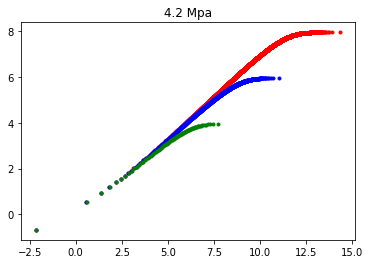

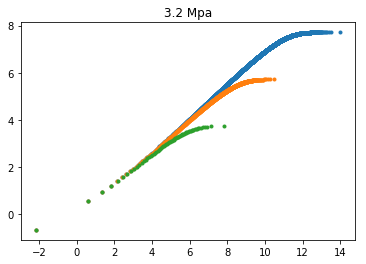

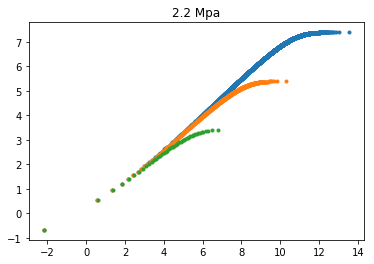

In [45]:
print(R_d)
print(T_d)
% matplotlib inline

color = ['r', 'b', 'g']
col = 0
i = 4.2*10**6         # iterate for delta_ps
for j in range(len(Dimensionless_a)):     # iterate for dimensionless_a
    plt.plot(np.log10(T_d['%i'%i][j][:]),np.log10(R_d['%i'%i][j][:]**2 - 1), '.', c = color[col])
    col += 1
plt.title('4.2 Mpa')
plt.show()

i = 3.2*10**6
for j in range(len(Dimensionless_a)):     # iterate for dimensionless_a
    plt.plot(np.log10(T_d['%i'%i][j][:]),np.log10(R_d['%i'%i][j][:]**2 - 1), '.')
plt.title('3.2 Mpa')
plt.show()

i = 2.2*10**6
for j in range(len(Dimensionless_a)):     # iterate for dimensionless_a
    plt.plot(np.log10(T_d['%i'%i][j][:]),np.log10(R_d['%i'%i][j][:]**2 - 1), '.')
plt.title('2.2 Mpa')
plt.show()

## (6) Probability analysis. SLAM Algorithm

In [47]:
# wellbore length--- open-hole
import pandas as pd
L = 1000
node = 100
# the distribution for lost circulation
# the intial possibility
pr = [1./node]*node
length =[i for i in range(0,1000,10)]

prior = pd.DataFrame(pr,length)

# measurement updat
#def 

In [1]:
print('hellow world')

hellow world


In [2]:
import tensorflow as tf


ModuleNotFoundError: No module named 'tensorflow'